In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
my_data_dir = 'D:/data_set/casting_data/'
train_path = my_data_dir + 'train/'
test_path = my_data_dir + 'test/'

image_shape = (300,300,1)
batch_size = 32 #according your model and your choise


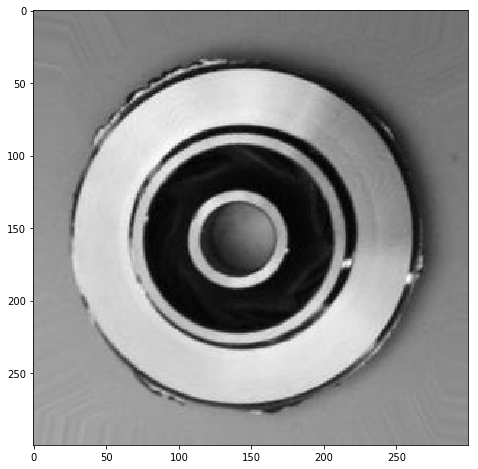

In [16]:
img1 = plt.imread('D:/data_set/casting_data/train/def_front/cast_def_0_1004.jpeg')
plt.figure(figsize=(12,8))
plt.imshow(img1,cmap='gray')


In [17]:
image_gen = ImageDataGenerator(rescale=1/255)# Rescale the image by normalzing it)

In [19]:
#we using keras inbuild function to ImageDataGenerator so we donnot need to lable all images into 0 and 1 it automatic create it and batch also during trainng 
train_set = image_gen.flow_from_directory('D:/data_set/casting_data/train',
                                               target_size=image_shape[:2],
                                                color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

test_set = image_gen.flow_from_directory('D:/data_set/casting_data/test',
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [20]:
train_set.class_indices

{'def_front': 0, 'ok_front': 1}

In [21]:
#Creating model

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))




model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

# Last layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=2)

W0928 14:30:25.983533  1952 deprecation.py:506] From C:\Users\ali hussain\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0928 14:30:26.362941  1952 deprecation.py:323] From C:\Users\ali hussain\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
results = model.fit_generator(train_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

Epoch 1/20
208/208 [==============================] - 143s 688ms/step - loss: 0.4735 - acc: 0.7604 - val_loss: 0.2827 - val_acc: 0.8685
Epoch 2/20
208/208 [==============================] - 149s 716ms/step - loss: 0.1646 - acc: 0.9474 - val_loss: 0.0707 - val_acc: 0.9860
Epoch 3/20
208/208 [==============================] - 186s 893ms/step - loss: 0.0902 - acc: 0.9705 - val_loss: 0.0471 - val_acc: 0.9916
Epoch 4/20
208/208 [==============================] - 152s 732ms/step - loss: 0.0476 - acc: 0.9870 - val_loss: 0.0260 - val_acc: 0.9930
Epoch 5/20
208/208 [==============================] - 153s 735ms/step - loss: 0.0292 - acc: 0.9926 - val_loss: 0.0215 - val_acc: 0.9944
Epoch 6/20
208/208 [==============================] - 149s 716ms/step - loss: 0.0317 - acc: 0.9916 - val_loss: 0.0223 - val_acc: 0.9972
Epoch 7/20
208/208 [==============================] - 151s 724ms/step - loss: 0.0322 - acc: 0.9897 - val_loss: 0.0134 - val_acc: 0.9972
Epoch 8/20
208/208 [============================

In [23]:
losses = pd.DataFrame(model.history.history)

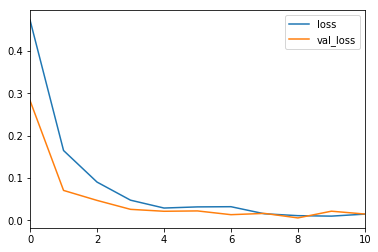

In [24]:
losses[['loss','val_loss']].plot()

In [27]:
#losses[['accuracy','val_accuracy']].plot()


In [28]:
#first we will find predict probability
pred_probability = model.predict_generator(test_set)

In [29]:
#here it's true label for test set
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
predictions = pred_probability > 0.5
#if model predict greater than 0.5 it conveted to 1 means ok_front

In [31]:
print(classification_report(test_set.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       453
           1       0.99      1.00      1.00       262

   micro avg       1.00      1.00      1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



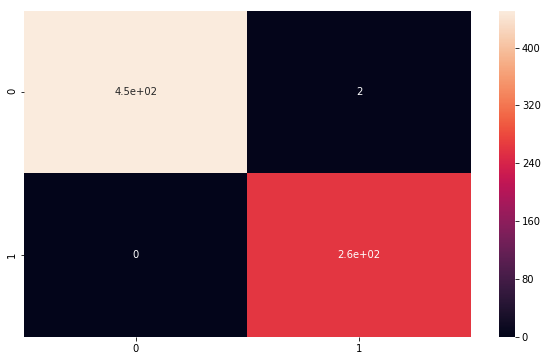

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_set.classes,predictions),annot=True)

In [33]:
#we already have string of test path
test_path

'D:/data_set/casting_data/test/'

In [34]:
img = cv2.imread(test_path+'ok_front/cast_ok_0_1020.jpeg',0)
img = img/255 #rescalinng
pred_img =img.copy()

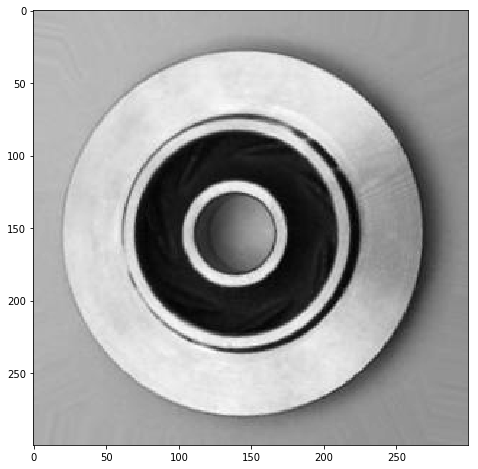

In [35]:
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

ok_front


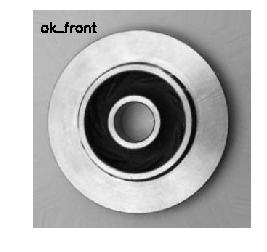

In [36]:
prediction = model.predict(img.reshape(-1,300,300,1))
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img,cmap='gray')
plt.axis('off')
plt.show()

In [37]:
img1 = cv2.imread(test_path+'def_front/cast_def_0_1134.jpeg',0)
img1 = img1/255
pred_img1 =img1.copy()

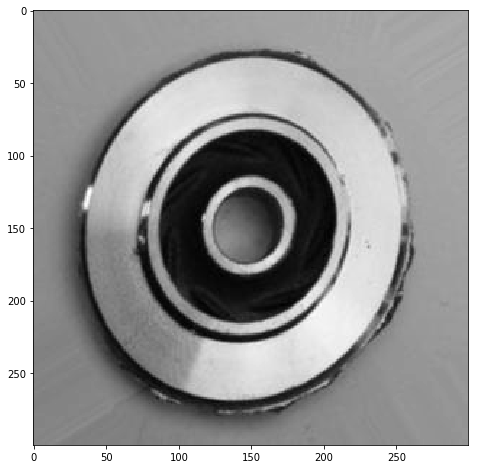

In [38]:
plt.figure(figsize=(12,8))
plt.imshow(img1,cmap='gray')

In [39]:
model.predict_proba(img.reshape(1,300,300,1))

array([[0.9999995]], dtype=float32)

def_front


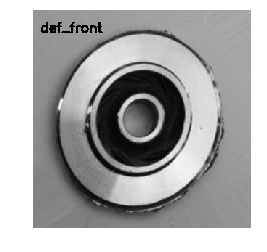

In [40]:
prediction = model.predict(img1.reshape(-1,300,300,1))
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img1, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img1, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img1,cmap='gray')
plt.axis('off')
plt.show()

In [42]:
model.save('D:/data_set/inspection_of_casting_products.h5')